1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import basinhopping
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from scipy import fftpack
from matplotlib.colors import LogNorm

In [3]:
# Define the function that we are interested in
def sixhump(x):
    return ((4 - 2.1*x[0]**2 + x[0]**4 / 3.) * x[0]**2 + x[0] * x[1]
            + (-4 + 4*x[1]**2) * x[1] **2)

# Make a grid to evaluate the function (for plotting)
x = np.linspace(-2, 2)
y = np.linspace(-1, 1)
xg, yg = np.meshgrid(x, y)

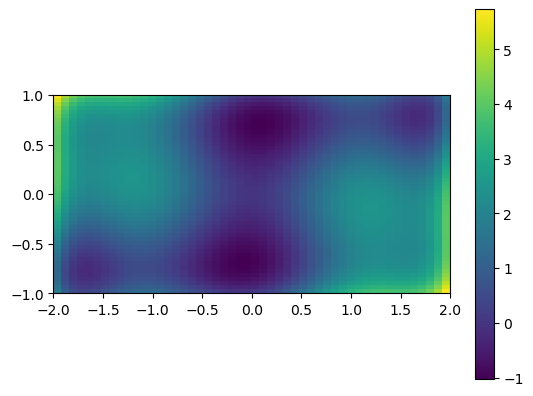

In [58]:
plt.figure()
plt.imshow(sixhump([xg, yg]), extent=[-2, 2, -1, 1])
plt.colorbar()

Text(0.5, 0.92, 'Six-hump Camelback function')

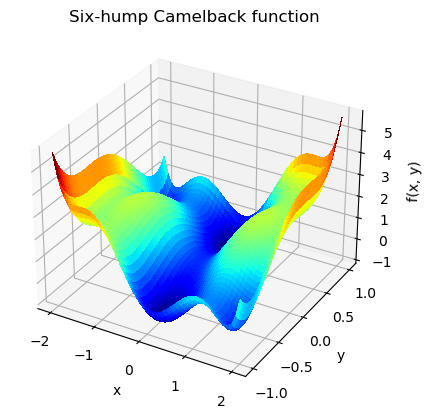

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(xg, yg, sixhump([xg, yg]), rstride=1, cstride=1,
                       cmap=plt.cm.jet, linewidth=0, antialiased=False)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Six-hump Camelback function')

In [205]:
x0 = [1,1]
solution = basinhopping(sixhump, x0)
#print(solution)
s = solution['lowest_optimization_result']
#p1 = (solution['x'][0], s['hess_inv'][0][1])
#p2 = (solution['x'][1], s['hess_inv'][1][1])
#print(p1)
#print(p2)
#ans =  ((solution['x'][0],solution['hess_inv'][0][1]),(solution['x'][1],solution['hess_inv'][1][1]))
#print(ans)
print("There are ", str(len(solution['x']))," global minimum for this function with values x: ", solution['x'])
print("There value of the function at these points is ", solution['fun'])

There are  2  global minimum for this function with values x:  [ 0.08984201 -0.7126564 ]
There value of the function at these points is  -1.0316284534898772


2\. **Non-linear ODE: the damped pendulum**

The equation of the motion that a pendulum makes with respect to the angle $\theta$ with the vertical is given by:

$$\frac{d^2\theta}{dt^2} = -\frac{1}{Q} \frac{d\theta}{dt} + \sin\theta + d \cos\Omega t$$

where $t$ is time, $Q$ is the damping factor, $d$ is the forcing amplitude, and $\Omega$ is the driving frequency of the forcing. 

This second order ODE needs to be written as two coupled first order ODEs defining a new variable $\omega \equiv d\theta/dt$:

$$\frac{d\theta}{dt} = \omega$$
$$\frac{d\omega}{dt} = -\frac{1}{Q}\,\omega + \sin\theta + d \cos\Omega t$$

Consider the initial conditions $\theta_0 = \omega_0 = 0$, and $Q = 2.0$, $d = 1.5$, and $\omega = 0.65$.

 - Solve the ODE with `odeint` over a pariod of 200 time steps
 - Create two plots, one of $\theta$ as a function of the time, and $\omega$ as a function of the time
 - **Optional**: determine if there is a set of parameters for which the motion is chaotic.

In [184]:
q = 2
d = 1.5
s_omega = .65
t = np.linspace(0,50,200)
initials = [0,0]

def derivative(initials, t, q, d, s_omega):
    omega = initials[0]
    teta = initials[1]
    return(teta, (-1/q)*omega + np.sin(teta) + d* np.cos(s_omega*t))

X = odeint(derivative, initials, t, args=(q, d, s_omega))

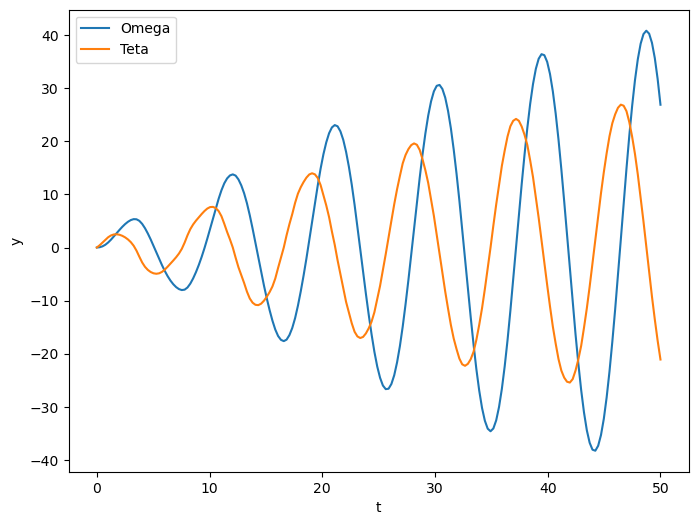

In [185]:
plt.figure(figsize=(8, 6))
plt.plot(t, X[:, 0], label="Omega")
plt.plot(t, X[:, 1], label="Teta")
plt.xlabel('t')
plt.ylabel('y')
plt.legend(loc='best')

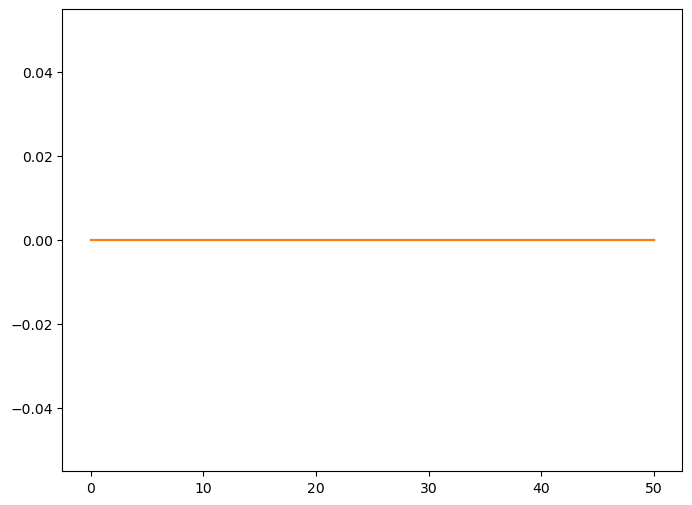

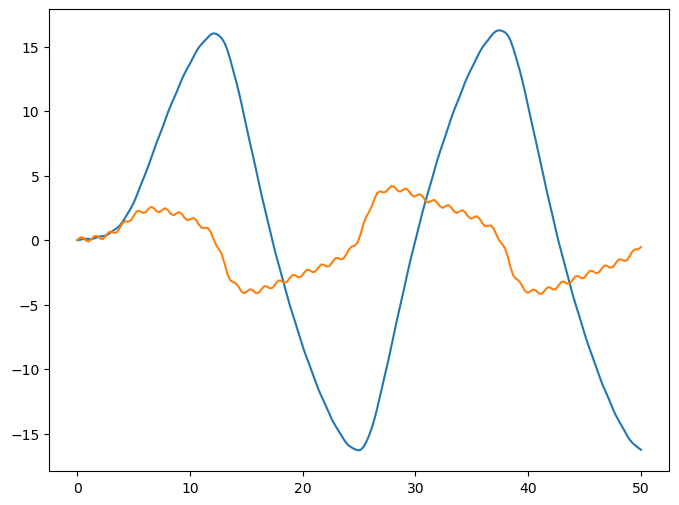

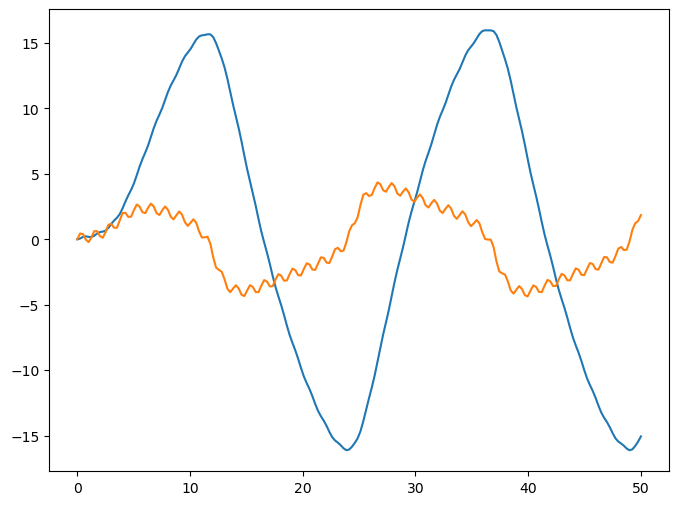

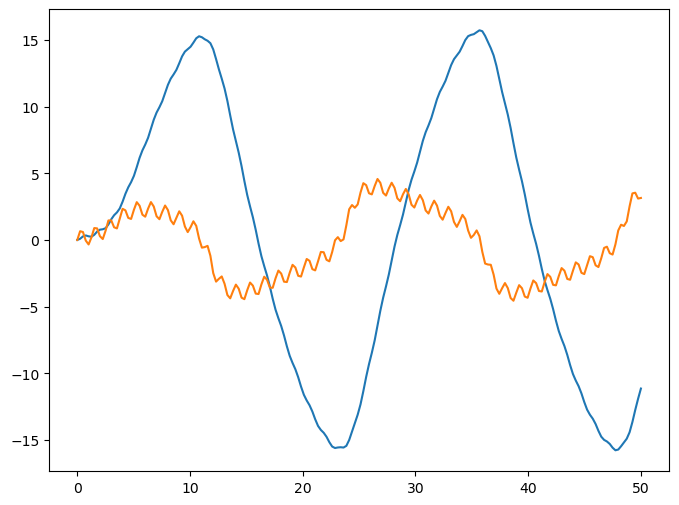

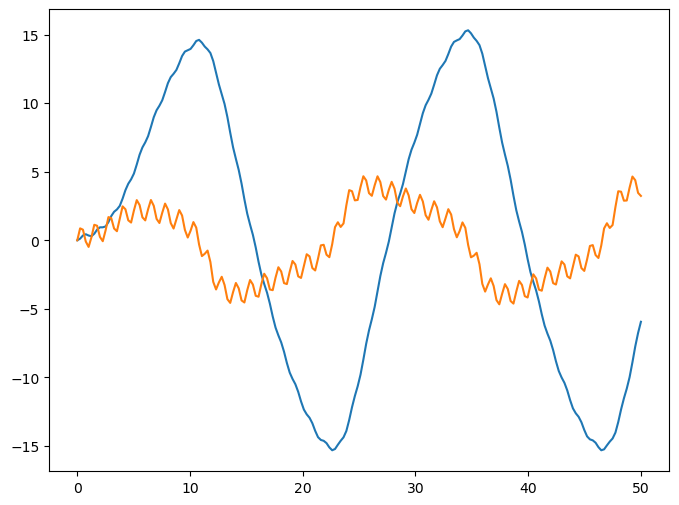

In [204]:
#chiotic
q = 10
d = 3
s_omega = 5
t = np.linspace(0,50,200)
initials = [0,0]

def derivative(initials, t, q, d, s_omega):
    omega = initials[0]
    teta = initials[1]
    return(teta, (-1/q)*omega + np.sin(teta) + d* np.cos(s_omega*t))

X = odeint(derivative, initials, t, args=(q, d, s_omega))
i=0
for i in range(5):
    d= i
    Q = i+2
    Omega = i+3
    X = odeint(derivative, initials, t, args=(q, d, s_omega))
    plt.figure(figsize=(8, 6))
    plt.plot(t, X[:, 0], label="Omega")
    plt.plot(t, X[:, 1], label="Teta")



3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

The dataset is the one dowloaded at the beginning of Lecture 06:

 - `!wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/`

In [80]:
 !wget https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt -P data/

--2023-01-12 19:19:00--  https://www.dropbox.com/s/ebe1cnyd2gm836a/populations.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ebe1cnyd2gm836a/populations.txt [following]
--2023-01-12 19:19:01--  https://www.dropbox.com/s/raw/ebe1cnyd2gm836a/populations.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb981e0fc409bfa813b7f0d0b45.dl.dropboxusercontent.com/cd/0/inline/B0ZXd2B2BU8JDL93OMwHbhTkGPdx-nmx1EuqCJCrghbXzfRU3EL6scwTQYZ9ISsB3vcKrJX-scDxpnxMP-SoZ9vSnl5B5qz8WIqCDqPrnsuK6MZNQSPrdLQm7zizRkNxDiC7XJlFWmQijI0Fc-xvwZEjE3K8xnMhu6rgMw2hAZa_xw/file# [following]
--2023-01-12 19:19:01--  https://ucb981e0fc409bfa813b7f0d0b45.dl.dropboxusercontent.com/cd/0/inline/B0ZXd2B2BU8JDL93OMwHbhTkGPdx-nmx1EuqCJCrghbXzfRU3EL6scwTQYZ9ISsB3vcK

In [81]:
!ls ./data/

populations.txt  weather.csv


In [86]:
!head -n 5 data/populations.txt

# year	hare	lynx	carrot
1900	30e3	4e3	48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200


In [86]:
data = pd.read_csv('data/populations.txt', sep='\t', lineterminator='\n')
#print(data['hare'])
hare = np.array(data['hare'])
lynx = np.array(data['lynx'])
time = np.array(data['# year'] - 1900)
print(hare)
      

[30000. 47200. 70200. 77400. 36300. 20600. 18100. 21400. 22000. 25400.
 27100. 40300. 57000. 76600. 52300. 19500. 11200.  7600. 14600. 16200.
 24700.]


The population of hares changes each  10.5 yers.
The population of lynxes changes each  10.5 yers.


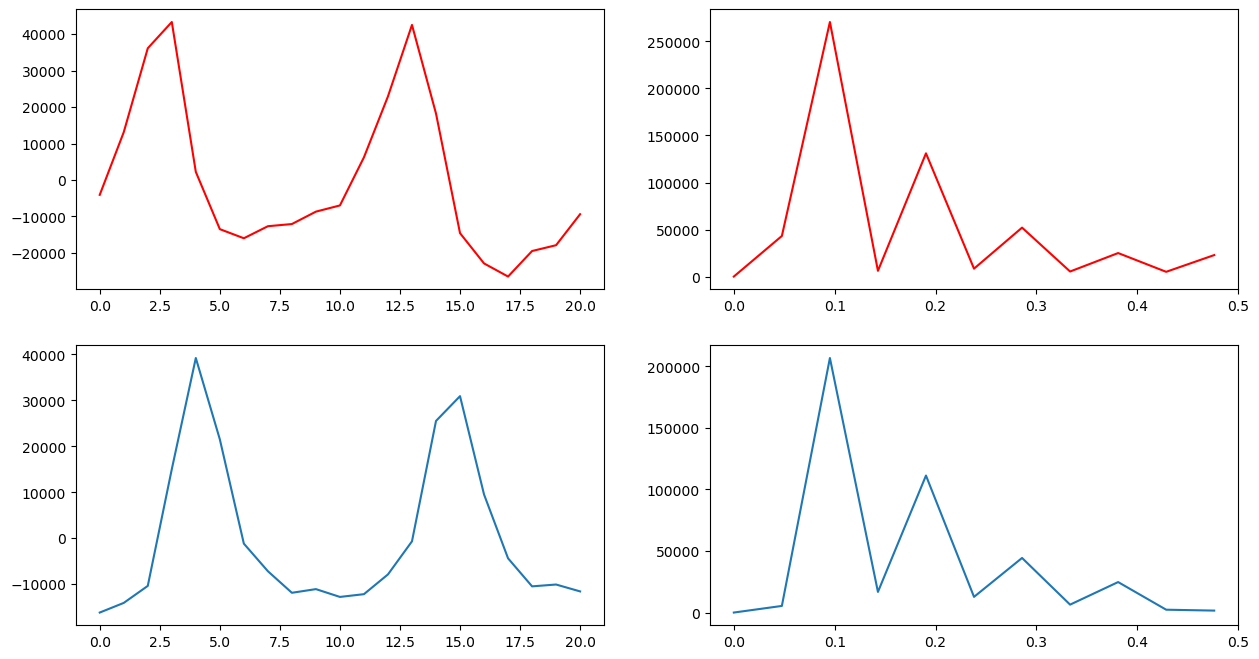

In [166]:
fig, axes = plt.subplots(nrows= 2, ncols=2,figsize=(15,8))
axes[0][0].plot(time,hare, color='red')
axes[1][0].plot(time, lynx)
hare = np.array(data['hare'])- np.mean(data['hare'])
lynx = np.array(data['lynx'])- np.mean(data['lynx'])

hare_fft = fftpack.fft(hare)
lynx_fft = fftpack.fft(lynx)

hare_power = np.abs(hare_fft)
lynx_power = np.abs(lynx_fft)

hare_freq = fftpack.fftfreq(hare_fft.size, d=1)
hare_freq = np.array(hare_freq)
lynx_freq = fftpack.fftfreq(lynx_fft.size, d=1)
lynx_freq = np.array(lynx_freq)


hare_mask = hare_freq >= 0
lynx_mask = lynx_freq >=0

hare_freq = hare_freq[hare_mask]
hare_power = hare_power[hare_mask]
lynx_freq = lynx_freq[lynx_mask]
lynx_power = lynx_power[lynx_mask]

axes[0][1].plot(hare_freq, hare_power, color='red')
axes[1][1].plot(lynx_freq, lynx_power)
#print(hare_power)
i = np.argmax(hare_power)
print("The population of hares changes each ", 1/hare_freq[i], 'yers.')
i = np.argmax(lynx_power)
print("The population of lynxes changes each ", 1/lynx_freq[i], 'yers.')

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("images/moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

In [107]:
!ls images

moonlanding.png


(474, 630)


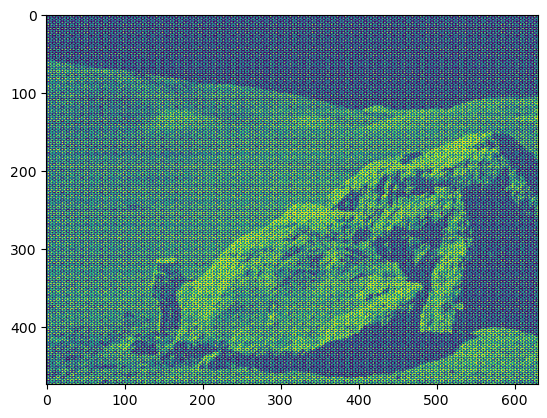

In [119]:
# Read the image
img = plt.imread('images/moonlanding.png')
plt.imshow(img)
print(img.shape)

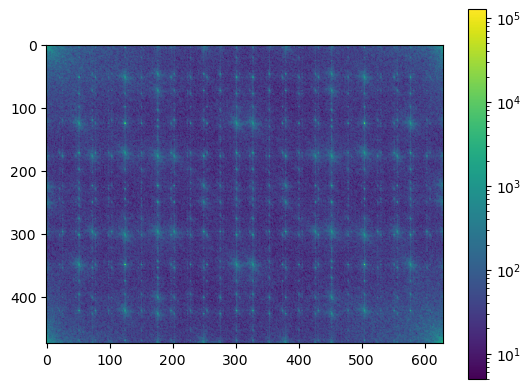

In [126]:
# Get 2D fft of the image
fft_img = fftpack.fft2(img)
pos_freq = np.abs(fft_img)
plt.imshow(pos_freq, norm=LogNorm(vmin=5))
plt.plot()
plt.colorbar()

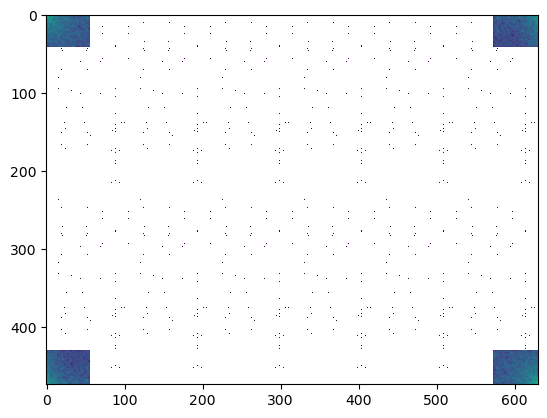

In [168]:
im_fft2 = fft_img.copy()
a, b = im_fft2.shape
precent = 0.09

#Just keep a presentage of columns and rows to filter the spectrum
im_fft2[int(a*precent):int(a*(1-precent)),:] = 0
im_fft2[:, int(b*precent):int(b*(1-precent))] = 0

plt.figure()
plt.imshow(np.abs(im_fft2), norm=LogNorm(vmin=5))

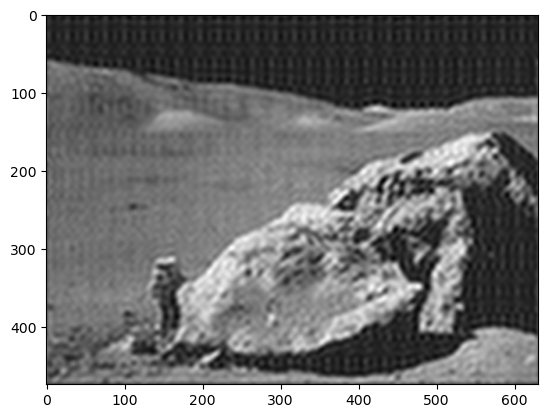

In [169]:
im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)